In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from wordcloud import WordCloud
import string
import re
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from textwrap import wrap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score,recall_score,f1_score, precision_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import spacy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX

## DATAFRAME 1 FOR TOYS :

In [5]:
Sdf1 = pd.read_json('/Users/maitrinarang/Downloads/Software.json', orient ='columns', lines= True)
Sdf1

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459431,2,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,NaN,NaN
459432,1,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,NaN,NaN
459433,5,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,NaN,NaN
459434,5,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,NaN,NaN


In [ ]:
Sdf1.shape

In [6]:
Sdf1.dtypes

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
dtype: object

## METADATA FOR SOFTWARE :

In [3]:
Smeta1 = pd.read_json('/Users/maitrinarang/Downloads/meta_Software.json', orient ='columns', lines= True)
Smeta1.head(2)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],,HOLT. RINEHART AND WINSTON,[],"25,550 in Software (",[],Software,,</div>,.a-box-inner{background-color:#fff}#alohaBuyBo...,0030672120,[],[],NaN
1,[],,"[, <b>Latin rhythms that will get your kids si...",,"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...",[],,McGraw Hill,[],"15,792 in Software (",[],Software,,</div>,,0071480935,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [7]:
Smeta1.shape

(26790, 19)

In [8]:
Smeta1.dtypes

category           object
tech1              object
description        object
fit                object
title              object
also_buy           object
tech2              object
brand              object
feature            object
rank               object
also_view          object
main_cat           object
similar_item       object
date               object
price              object
asin               object
imageURL           object
imageURLHighRes    object
details            object
dtype: object

In [15]:
# Using apply() method to combine two columns of text

#here summary is the headline of review and review text is the text 

Sdf1["review"] = Sdf1[["reviewText"]]
Sdf1.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN,The materials arrived early and were in excell...
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN,I am really enjoying this book with the worksh...


In [17]:
Sdf1['reviewTime'] = pd.to_datetime(Sdf1['reviewTime'])
Sdf1['year'] = pd.DatetimeIndex(Sdf1['reviewTime']).year

In [18]:
Sdf1.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             225035
reviewerName          24
reviewText            66
summary               56
unixReviewTime         0
vote              331583
image             457928
review                66
year                   0
dtype: int64

In [26]:
Sdf1['review']= Sdf1['review'].apply(str)

In [27]:
def cleaning(text):
    text= re.sub("[^0-9A-Za-z\-]+", " ",text) 
    #remove special character 
    text= re.sub("(?<!\w)\d+" , " ", text) 
    #if number is written after a word remove it
    text= re.sub("-(?!\w)|(?<!\w)-", "", text)
    #remove hypen except within two words
    text=" ".join(text.split())
    text=text.lower()
    
    return text

In [28]:
Sdf1.review.apply(cleaning)

0         the materials arrived early and were in excell...
1         i am really enjoying this book with the worksh...
2         if you are taking this class don t waste your ...
3         this book was missing pages important pages i ...
4         i have used learnsmart and can officially say ...
                                ...                        
459431    no instructions no help unless you want to pay...
459432                                          it s a joke
459433    i have multiple licenses of the antivirus i ha...
459434                                           good value
459435                        very nice designs easy to use
Name: review, Length: 459436, dtype: object

In [29]:
# Statistics of non-numeric variables

# Number of unique customers
print('\n Number of unique customers : {}'.format(len(Sdf1['reviewerID'].unique())))
      
# Number of unique products
print('\n Number of unique products : {}'.format(len(Sdf1['asin'].unique())))
      
# Review number per unique customer
print('\n Review per customer: {}'.format((len(Sdf1)/len(Sdf1['reviewerID'].unique()))))      

# Review number per unique product 
print('\n Review per product: {}'.format((len(Sdf1)/len(Sdf1['asin'].unique()))))


 Number of unique customers : 375147

 Number of unique products : 21663

 Review per customer: 1.2246825910909591

 Review per product: 21.20832756312607


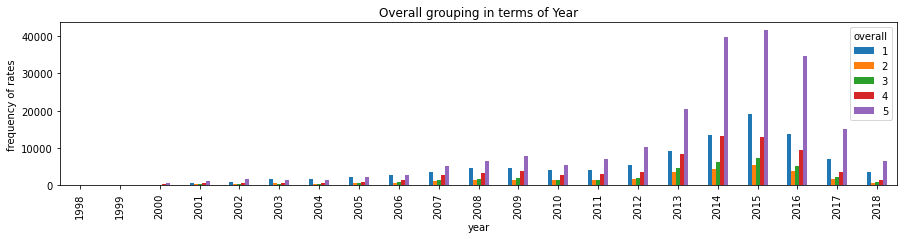

In [31]:
def rate(df):
    year_rate = pd.crosstab(df.year, df.overall, rownames = ['year'], colnames = ['overall'])
    #print(year_rate)
    year_rate.plot(kind = 'bar', figsize= (15, 3))
    plt.ylabel('frequency of rates')
    plt.title ('Overall grouping in terms of Year');
    
rate(Sdf1)

In [32]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
def sentiments(df):
    df['Polarity'] = df['review'].apply(get_polarity)
    df['Sentiment_Type']=''
    df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
    df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
    df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'
    df.head(3)

In [33]:
sentiments(Sdf1)
Sdf1.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review,year,Polarity,Sentiment_Type
0,4,True,2014-03-11,A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN,The materials arrived early and were in excell...,2014,0.224615,POSITIVE
1,4,True,2014-02-23,A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN,I am really enjoying this book with the worksh...,2014,0.250000,POSITIVE


## ANALYSIS OF OVERALL SENTIMENT DISTRIBUTION OF DATA :

In [34]:
def majority(df):
    sentiment = df['Sentiment_Type'].value_counts()
    print(sentiment)

    pos = sentiment[0]
    neg = sentiment[1]
    neu = sentiment[2]

    def sentiment_score(ptv, ntv, ntrl):
        if (ptv > ntv) and (ptv > ntrl):
            print("max sentiment are Positive 😊 ")
        elif (ntv > ptv) and (ntv > ntrl):
            print("max sentiment are Negative 😠 ")
        else:
            print("max sentiment are Neutral 😐 ")
    sentiment_score(pos, neg, neu)

    df.Sentiment_Type.value_counts().plot(kind='bar', ylabel = 'frequency of sentiments', title="Sentiment Analysis");

POSITIVE    343594
NEGATIVE     73684
NEUTRAL      42158
Name: Sentiment_Type, dtype: int64
max sentiment are Positive 😊 


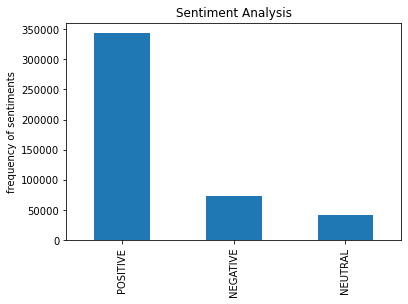

In [35]:
majority(Sdf1)

## MERGING DATAFRAMES :

In [38]:
df_v = pd.merge(Sdf1, Smeta1, on="asin", how="inner")
df_v.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,4,True,2014-03-11,A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,4,True,2014-02-23,A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [191]:
dfV = df_v[['asin', 'overall', 'review','Sentiment_Type','title', 'main_cat', 'category']]
dfV.head(2)

,asin,overall,review,Sentiment_Type,title,main_cat,category
0,0077613252,4,The materials arrived early and were in excell...,POSITIVE,Connect Personal Health with LearnSmart 1 Seme...,Software,[]
1,0077613252,4,I am really enjoying this book with the worksh...,POSITIVE,Connect Personal Health with LearnSmart 1 Seme...,Software,[]


## TOP10 POSITIVE SENTIMENT PRODUCTS :

In [41]:
positive_df1 = dfV[(dfV.Sentiment_Type == 'POSITIVE')]
positive1 = positive_df1[('Sentiment_Type')].groupby(positive_df1['main_cat']).value_counts()
pos_sent1 = pd.DataFrame({'count':((positive1.sort_values(ascending = False)).head(10))}).reset_index()
pos_sent1

,main_cat,Sentiment_Type,count
0,Software,POSITIVE,351173
1,Video Games,POSITIVE,9086
2,All Electronics,POSITIVE,3451
3,Cell Phones & Accessories,POSITIVE,3313
4,Toys & Games,POSITIVE,1846
5,Movies & TV,POSITIVE,1189
6,Cell Phones &amp; Accessories,POSITIVE,822
7,Books,POSITIVE,716
8,Musical Instruments,POSITIVE,606
9,Office Products,POSITIVE,567


## REASON OF POSITIVE RESPONSE AND WHAT TO MARKET MORE :

In [42]:
# Function for generating word clouds
cv=CountVectorizer(analyzer='word')
def review_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(5 ,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
#df_dtm=df_dtm.transpose()

In [44]:
pos_df1 = dfV[(dfV.Sentiment_Type == 'POSITIVE')]
pos1 = pos_df1[('Sentiment_Type')].groupby(positive_df1['asin']).value_counts()
pos_1 = pd.DataFrame({'count':((pos1.sort_values(ascending = False)).head(10))}).reset_index()
#pos_1
g = pos_1.asin
pos_df1 = pd.merge(Sdf1, g,on='asin')
pos_df1 = pos_df1[(pos_df1.Sentiment_Type == 'POSITIVE')]
#pos_df1.head(3)

# Loading model
nlp = spacy.load('en_core_web_sm',disable = ['parser', 'ner'])

# Lemmatization with stopwords removal
pos_df1['review'] = pos_df1['review'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

df_grouped1 = pos_df1[['asin','review']].groupby(by='asin').agg(lambda x:' '.join(x))
df_grouped1

,review
asin,
B000HCZ8EO,year Microsoft release upgrade Excel 97 cosmet...
B008H3SW4I,instal Developer Public Releases Windows 8 . ...
B008RA5A00,test version Quicken Turbotax year . \n enjoy ...
B00CTTEKJW,use time . recommend . purchase download music...
B00E6LJ2SA,early experience good . Quicken convert mana...
B00EZPXYP4,"Norton 360 2009 , 6 month time period year ago..."
B00H9A60O4,avast ! free year problem . silently - protect...
B00NG7JVSQ,Intuit big change 2014 . need schedule d ( C...
B00UB76290,download sns u maid SERVICED po ' ok download ...


In [45]:
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped1['review'])
df_dtm1 = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm1.index = df_grouped1.index
df_dtm1 = df_dtm1.transpose()
df_dtm1.head(3)

asin,B000HCZ8EO,B008H3SW4I,B008RA5A00,B00CTTEKJW,B00E6LJ2SA,B00EZPXYP4,B00H9A60O4,B00NG7JVSQ,B00UB76290,B015724OVG
00,22,14,20,16,15,24,19,107,9,19
000,0,1,5,62,7,1,0,12,5,0
00001,0,1,0,0,0,0,0,0,0,0


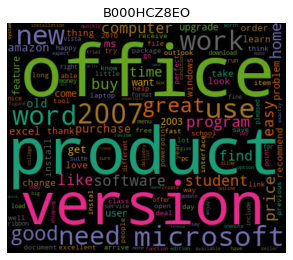

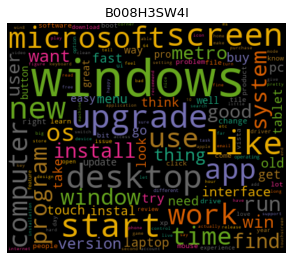

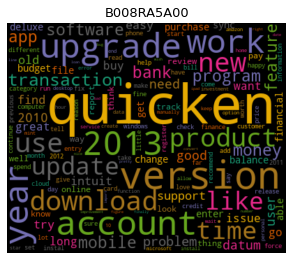

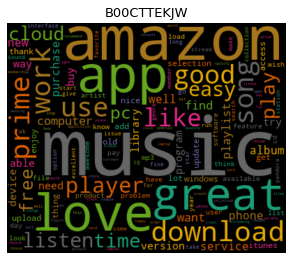

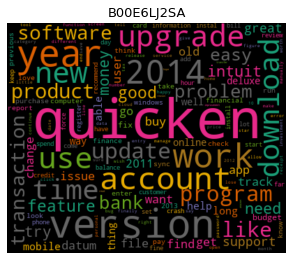

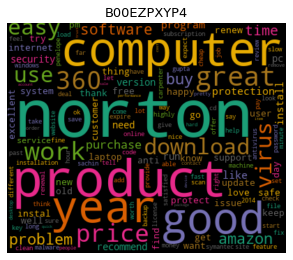

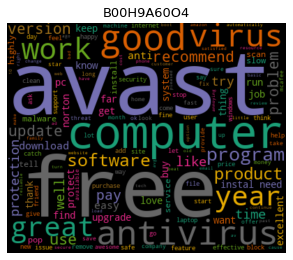

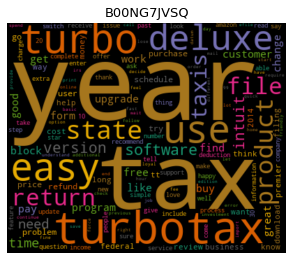

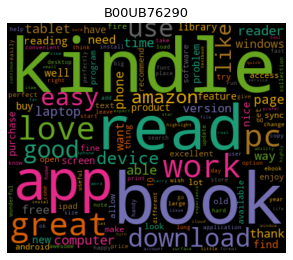

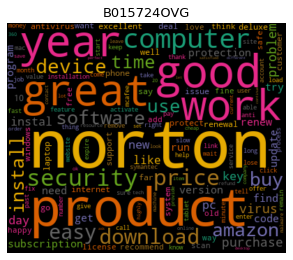

In [46]:
# Plotting word cloud for each product
for index,product in enumerate(df_dtm1.columns):
    review_wordcloud(df_dtm1[product].sort_values(ascending=False),product)

In [48]:
# Declare a list that is to be converted into a column
reasons = ['good_student_microsoft_office_version',
           'fast_microsoft_windows_like_screen',
           'quicken_work_product_version',
           'love_amazon_prime_music_app_download',
           'quicken_work_upgraded_version',
           'good_norton360_computer_product',
           'free_antivirus_great_computer',
           'great_turbo_tax_year_product',
           'great_kindle_book_app_easy_download',
           'good_norton_security_product']

# Using 'album_name' as the column name and equating it to the list
df_grouped1['reason of liking'] = reasons
df_grouped1

,review,reason of liking
asin,,
B000HCZ8EO,year Microsoft release upgrade Excel 97 cosmet...,good_student_microsoft_office_version
B008H3SW4I,instal Developer Public Releases Windows 8 . ...,fast_microsoft_windows_like_screen
B008RA5A00,test version Quicken Turbotax year . \n enjoy ...,quicken_work_product_version
B00CTTEKJW,use time . recommend . purchase download music...,love_amazon_prime_music_app_download
B00E6LJ2SA,early experience good . Quicken convert mana...,quicken_work_upgraded_version
B00EZPXYP4,"Norton 360 2009 , 6 month time period year ago...",good_norton360_computer_product
B00H9A60O4,avast ! free year problem . silently - protect...,free_antivirus_great_computer
B00NG7JVSQ,Intuit big change 2014 . need schedule d ( C...,great_turbo_tax_year_product
B00UB76290,download sns u maid SERVICED po ' ok download ...,great_kindle_book_app_easy_download


In [196]:
n = dfV[(dfV.asin == 'B00E6LJ2SA')]
n

,asin,overall,review,Sentiment_Type,title,main_cat,category
251917,B00E6LJ2SA,1,Too bad there is not a zero rating available t...,NEGATIVE,Quicken Deluxe 2014 [Old Version],Software,[]
251918,B00E6LJ2SA,2,Early experience is not very good. I have bee...,POSITIVE,Quicken Deluxe 2014 [Old Version],Software,[]
251919,B00E6LJ2SA,4,I have been using Quicken since the days of DO...,POSITIVE,Quicken Deluxe 2014 [Old Version],Software,[]
251920,B00E6LJ2SA,2,I don't know why I always bother to upgrade ev...,POSITIVE,Quicken Deluxe 2014 [Old Version],Software,[]
251921,B00E6LJ2SA,3,I downloaded Quicken 2014 as soon as it became...,POSITIVE,Quicken Deluxe 2014 [Old Version],Software,[]
...,...,...,...,...,...,...,...
255960,B00E6LJ2SA,1,Keep asking me to update every time it starts ...,NEGATIVE,Quicken Deluxe 2014 [Old Version],Software,[]
255961,B00E6LJ2SA,5,Product as described.,NEUTRAL,Quicken Deluxe 2014 [Old Version],Software,[]
255962,B00E6LJ2SA,1,Cannot import qfx file without doing an online...,POSITIVE,Quicken Deluxe 2014 [Old Version],Software,[]
255963,B00E6LJ2SA,5,thanks,POSITIVE,Quicken Deluxe 2014 [Old Version],Software,[]


## TOP10 NEGATIVE SENTIMENT PRODUCTS :

In [49]:
neg_df1 = dfV[(dfV.Sentiment_Type == 'NEGATIVE')]
neg1 = neg_df1[('Sentiment_Type')].groupby(neg_df1['asin']).value_counts()
neg_1 = pd.DataFrame({'count':((neg1.sort_values(ascending = False)).head(10))}).reset_index()
neg_1

,asin,Sentiment_Type,count
0,B00NG7JVSQ,NEGATIVE,1047
1,B00CTTEKJW,NEGATIVE,1039
2,B00E6LJ2SA,NEGATIVE,883
3,B00UB76290,NEGATIVE,801
4,B00M76N6MO,NEGATIVE,586
5,B008RA5A00,NEGATIVE,503
6,B00H9A60O4,NEGATIVE,486
7,B003PDMNCC,NEGATIVE,438
8,B00E6LJBUO,NEGATIVE,417
9,B00MYXTCGY,NEGATIVE,413


In [50]:
a = neg_1.asin
neg_df1 = pd.merge(Sdf1, a,on='asin')
neg_df1.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review,year,Polarity,Sentiment_Type
0,1,True,2010-02-23,A1NIFL23BTH4OW,B003PDMNCC,NaN,jsschi,If there was a way to give this product 0-star...,Worthless--non essential for the Mac. Cannot p...,1266883200,529,NaN,If there was a way to give this product 0-star...,2010,0.078299,POSITIVE
1,1,True,2010-02-23,A1G12VOFQL9KZM,B003PDMNCC,NaN,BoxLynx,The product is downright useless upgrade. I ha...,Quicken mac Essential is the worst upgrade eve...,1266883200,38,NaN,The product is downright useless upgrade. I ha...,2010,0.000000,NEUTRAL
2,1,True,2010-02-22,A1CJ6JJD1AVRZK,B003PDMNCC,NaN,D. Blum,What were they thinking? You can't write check...,You can't write or print checks!,1266796800,24,NaN,What were they thinking? You can't write check...,2010,-0.250000,NEGATIVE


In [51]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable = ['parser', 'ner'])

# Lemmatization with stopwords removal
neg_df1['review'] = neg_df1['review'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))

In [52]:
df_grouped3 = neg_df1[['asin','review']].groupby(by='asin').agg(lambda x:' '.join(x))
df_grouped3.head()

,review
asin,
B003PDMNCC,way product 0 - star rating . good thing 60 - ...
B008RA5A00,test version Quicken Turbotax year . \n enjoy ...
B00CTTEKJW,use time . recommend . purchase download music...
B00E6LJ2SA,bad zero rating available . know compete perso...
B00E6LJBUO,main program remain similar Quicken 2012 versi...


In [53]:
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped3['review'])
df_dtm2 = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm2.index = df_grouped3.index
df_dtm2 = df_dtm2.transpose()
df_dtm2.head(3)

asin,B003PDMNCC,B008RA5A00,B00CTTEKJW,B00E6LJ2SA,B00E6LJBUO,B00H9A60O4,B00M76N6MO,B00MYXTCGY,B00NG7JVSQ,B00UB76290
00,10,22,20,19,13,27,15,55,155,11
000,16,8,92,17,6,0,11,8,13,5
000025,0,1,0,0,0,0,0,0,0,0


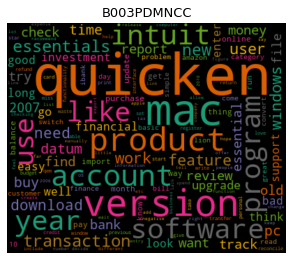

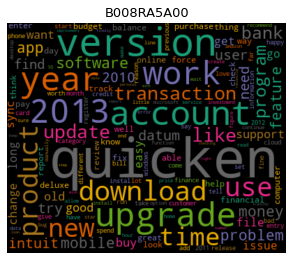

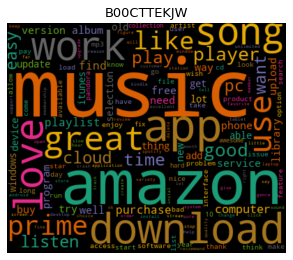

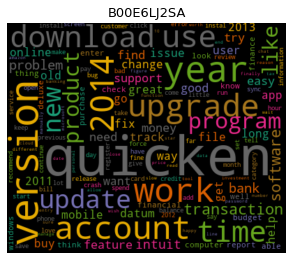

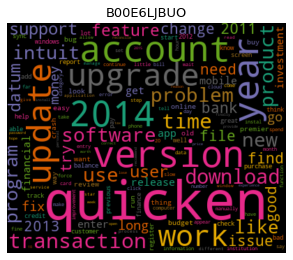

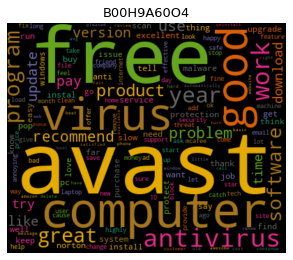

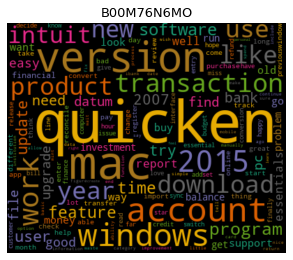

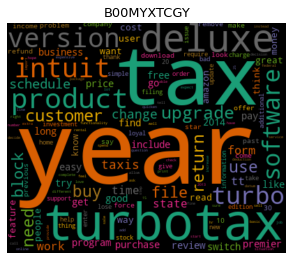

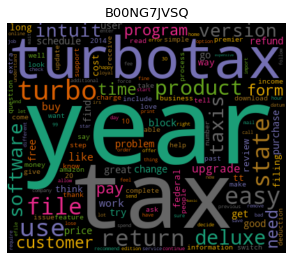

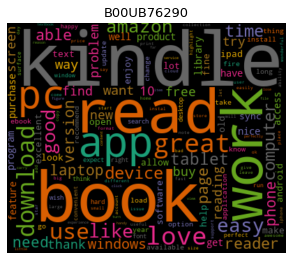

In [54]:
# Plotting word cloud for each product
for index,product in enumerate(df_dtm2.columns):
    review_wordcloud(df_dtm2[product].sort_values(ascending=False),product)

In [55]:
# Declare a list that is to be converted into a column
reasons = ['long_download_transaction_mac',
           'long_download_time',
           'purchase_song_download_cloud',
           'change_2014_upgrade_version',
           '2014_version_work_issue',
           'install_antivirus_problem',
           'need_mac_version',
           'change_turbotax_upgrade_product',
           'return_deluxe_turbotax_software',
           'problem_ipad_download_pc']

# Using 'album_name' as the column name and equating it to the list
df_grouped3['reason of disliking'] = reasons
df_grouped3

,review,reason of disliking
asin,,
B003PDMNCC,way product 0 - star rating . good thing 60 - ...,long_download_transaction_mac
B008RA5A00,test version Quicken Turbotax year . \n enjoy ...,long_download_time
B00CTTEKJW,use time . recommend . purchase download music...,purchase_song_download_cloud
B00E6LJ2SA,bad zero rating available . know compete perso...,change_2014_upgrade_version
B00E6LJBUO,main program remain similar Quicken 2012 versi...,2014_version_work_issue
B00H9A60O4,avast ! free year problem . silently - protect...,install_antivirus_problem
B00M76N6MO,""" Bill Pay include time . "" \n\n "" feature "" b...",need_mac_version
B00MYXTCGY,"deluxe version schedule C , D , e remove , mak...",change_turbotax_upgrade_product
B00NG7JVSQ,Intuit big change 2014 . need schedule d ( C...,return_deluxe_turbotax_software


In [201]:
n = dfV[(dfV.asin == 'B00H9A60O4')]
n

,asin,overall,review,Sentiment_Type,title,main_cat,category
299540,B00H9A60O4,5,I have been using avast! Free for many years a...,POSITIVE,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
299541,B00H9A60O4,5,I have been using this program installed by my...,POSITIVE,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
299542,B00H9A60O4,1,As soon as I completed the installation proces...,NEUTRAL,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
299543,B00H9A60O4,1,Hi I recently purchased a $600 gaming pc which...,POSITIVE,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
299544,B00H9A60O4,5,Qi like everything. Specially the convenience ...,POSITIVE,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
...,...,...,...,...,...,...,...
304265,B00H9A60O4,3,I am tempted to try their internet service for...,NEUTRAL,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
304266,B00H9A60O4,1,Don't waste your money or your time with this ...,NEGATIVE,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
304267,B00H9A60O4,1,This free virus software was a constant resour...,POSITIVE,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."
304268,B00H9A60O4,1,Do not load this piece of crap. It is nothing...,NEGATIVE,Avast Free Antivirus 2015 [Download],Software,"[Software, Digital Software, Antivirus & Secur..."


# CLASSIFICATION :


In [57]:
dfv = pd.merge(Sdf1, Smeta1, on="asin", how="inner")
dfv.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,4,True,2014-03-11,A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,4,True,2014-02-23,A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,...,[],"15,675 in Software (",[],Software,,</div>,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [202]:
def compute_class(df):
    df.loc[(df['Sentiment_Type'] == 'POSITIVE') & (df['overall'] <= 4) ,'Customer_churn'] = 'NO'
    df.loc[(df['Sentiment_Type'] == 'NEGATIVE') & (df['overall'] < 4) ,'Customer_churn'] = 'YES'
    df.loc[((df['Sentiment_Type'] =='NEUTRAL') & (df['overall'] < 4)), 'Customer_churn'] = 'YES'
    df['Customer_churn'].fillna('YES', inplace=True)
    

In [59]:
compute_class(dfv)

In [203]:
dfv.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,Customer_churn
0,4,True,2014-03-11,A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,...,"15,675 in Software (",[],Software,,</div>,49,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NO
1,4,True,2014-02-23,A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,...,"15,675 in Software (",[],Software,,</div>,49,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NO


In [204]:
dfv['Customer_churn'].value_counts()

YES    324701
NO     175130
Name: Customer_churn, dtype: int64

In [61]:
dfv.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'review', 'year', 'Polarity', 'Sentiment_Type', 'category',
       'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand',
       'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date',
       'price', 'imageURL', 'imageURLHighRes', 'details', 'Customer_churn'],
      dtype='object')

In [63]:
fdf = dfv.loc[:, ["asin","reviewerID", "main_cat","review","overall" , "Sentiment_Type", "Customer_churn"]]
fdf.head(1)

,asin,reviewerID,main_cat,review,overall,Sentiment_Type,Customer_churn
0,0077613252,A240ORQ2LF9LUI,Software,The materials arrived early and were in excell...,4,POSITIVE,NO


## taking a smaller df for model building

In [64]:
a= fdf[:50000]
a

,asin,reviewerID,main_cat,review,overall,Sentiment_Type,Customer_churn
0,0077613252,A240ORQ2LF9LUI,Software,The materials arrived early and were in excell...,4,POSITIVE,NO
1,0077613252,A1YCCU0YRLS0FE,Software,I am really enjoying this book with the worksh...,4,POSITIVE,NO
2,0077613252,A1BJHRQDYVAY2J,Software,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",1,POSITIVE,NO
3,0077613252,APRDVZ6QBIQXT,Software,This book was missing pages!!! Important pages...,3,POSITIVE,NO
4,0077613252,AG0LTM6JLS4TP,Software,Very informative. Easy for studying.,5,POSITIVE,YES
...,...,...,...,...,...,...,...
49995,B00029J1SG,AFKJOCTJOSTLV,Software,Without this support intuit is forcing people ...,2,NEUTRAL,YES
49996,B00029J1SG,AFKJOCTJOSTLV,Software,Without this support intuit is forcing people ...,2,NEUTRAL,YES
49997,B00029J1SG,A1XSOZZOTB282D,Software,If Intuit doesn't allow us to use our existing...,1,NEGATIVE,YES
49998,B00029J1SG,A1XSOZZOTB282D,Software,If Intuit doesn't allow us to use our existing...,1,NEGATIVE,YES


In [65]:
encoder_1 = preprocessing.LabelEncoder()

encoder_1.fit(a.Customer_churn)
print(encoder_1.classes_)
a.Customer_churn = encoder_1.transform(a.Customer_churn)

['NO' 'YES']


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [67]:
sX = tfidf_vectorizer.fit_transform(a['review'].values)
sy = a['Customer_churn'].values




In [68]:
a['Customer_churn'].value_counts()

1    30088
0    19912
Name: Customer_churn, dtype: int64

## balancing the classes using SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.25, random_state=10)

print("Number transactions X_train dataset: ", sX_train.shape)
print("Number transactions y_train dataset: ", sy_train.shape)
print("Number transactions X_test dataset: ", sX_test.shape)
print("Number transactions y_test dataset: ", sy_test.shape)

Number transactions X_train dataset:  (37500, 40883)
Number transactions y_train dataset:  (37500,)
Number transactions X_test dataset:  (12500, 40883)
Number transactions y_test dataset:  (12500,)


In [70]:
print("Before OverSampling, counts of label '1': {}".format(sum(sy_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(sy_train==0)))

sm = SMOTE()
sX_train_res, sy_train_res = sm.fit_resample(sX_train, sy_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(sX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(sy_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(sy_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(sy_train_res==0)))

Before OverSampling, counts of label '1': 22546
Before OverSampling, counts of label '0': 14954 

After OverSampling, the shape of train_X: (45092, 40883)
After OverSampling, the shape of train_y: (45092,) 

After OverSampling, counts of label '1': 22546
After OverSampling, counts of label '0': 22546


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



In [72]:
# define lists to gather results for plotting later
results, names = list(), list()

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(classifier_rf, sX,sy , scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('RF')

print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



ACCURACY: 0.622 (0.001)


In [74]:
# define the model
model = DecisionTreeClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, sX,sy, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('DT')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ACCURACY: 0.904 (0.005)


In [75]:
# define the model
model = AdaBoostClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
n_scores = cross_val_score(model, sX, sy, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores)
names.append('ada')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ACCURACY: 0.699 (0.004)


In [76]:
from sklearn.linear_model import LogisticRegression

# creating a logistic regression classifier
logregs = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(logregs, sX, sy, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('LR')

# report performance
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maitrinarang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

ACCURACY: 0.770 (0.004)


In [77]:
names

['RF', 'DT', 'ada', 'LR']

In [78]:
results

[array([0.6232, 0.6228, 0.6207, 0.6219, 0.6227, 0.6252, 0.6213, 0.622 ,
        0.6204, 0.6211]),
 array([0.8999, 0.9006, 0.904 , 0.9095, 0.9055, 0.8955, 0.9116, 0.9059,
        0.8997, 0.9058]),
 array([0.6988, 0.6994, 0.6966, 0.6981, 0.7034, 0.7061, 0.6988, 0.6988,
        0.6901, 0.6999]),
 array([0.7777, 0.7645, 0.7688, 0.7674, 0.7684, 0.7741, 0.7671, 0.7753,
        0.7673, 0.7679, 0.7631, 0.7696, 0.7701, 0.7703, 0.7741])]

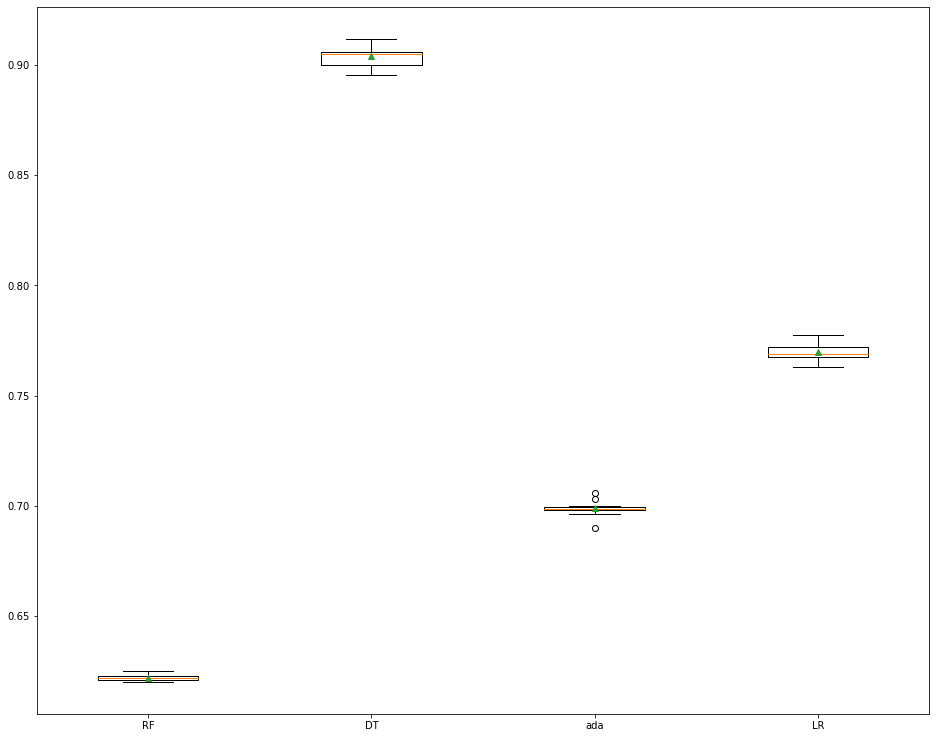

In [79]:
plt.figure(figsize=(16,13))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## CLUSTERING :

In [80]:
dfv['price'].value_counts()

In [81]:
dfv['price'] = dfv['price'].replace('\n\t\t                                            \n\r\n\r\n\r\n\r\n\r\n    \r\n    \r\n        \r\n        \n\n\n\n\n\n\n\n\n\n\n\n    \n    \n    \n       \n           <div class="a-section a-spacing-none"', '')




In [82]:
dfv['price'] = dfv['price'].replace('.a-box-inner{background-color:#fff}#alohaBuyBoxWidget .selected{background-color:#fffbf3;border-color:#e77600;box-shadow:0 0 3px rgba(228,121,17,.5)}#alohaBuyBoxWidget .contract-not-available{color:gray}#aloha-cart-popover .aloha-cart{height:auto;overflow:hidden}#aloha-cart-popover #aloha-cartInfo{float:left}#aloha-cart-popover #aloha-cart-details{float:right;margin-top:1em}#aloha-cart-popover .deviceContainer{width:160px;float:left;padding-right:10px;border-right:1px solid #ddd}#aloha-cart-popover li:last-child{border-right:0}#aloha-cart-popover .aloha-device-title{height:3em;overflow:hidden}#aloha-cart-popover .aloha-thumbnail-container{height:100px;margin-bottom:1em;text-align:center}#aloha-cart-popover .aloha-price-container{text-align:center}#aloha-cart-popover .aloha-thumbnail-container img{height:inherit}#aloha-cart-popover .aloha-cart{border-top:1px solid #ddd;border-bottom:1px solid #ddd}#aloha-cart-popover #aloha-cart-info{margin-right:0}#alohaBuyBoxWidget .without-contract-subheading{margin-right:0}#aloha-bb-help-nodes .aloha-bb-contract-term-heading{color:gray;font-family:arial;margin-top:.5em;text-align:center;height:.7em;border-bottom:1px solid gray;margin-bottom:1.6em}#aloha-bb-help-nodes .aloha-bb-contract-term-heading span{background-color:#fff;padding:0 10px 0 10px}#alohaAvailabilityUS_feature_div .availability a{text-decoration:none}#alohaPricingWidget a{text-decoration:none}#alohaAvailabilityUS_feature_div .availability{margin-top:-4px;margin-bottom:0}#alohaBuyBoxWidget .select-transaction-alert .a-icon-alert{top:18px;left:3px}#alohaBuyBoxWidget .select-transaction-alert .a-alert-container{padding-left:39px;width:290px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .contract-term-heading a{text-decoration:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .annual-contract-box .a-icon-popover{display:none}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .contract-container .annual-contract-box{cursor:pointer;cursor:hand}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget .aloha-buybox-price{font-size:15px}#alohaBuyBoxUS_feature_div #alohaBuyBoxWidget #linkOffSection a{text-decoration:none}#alohaBuyBoxUS_feature_div .lockedUsedBuyboxContainer{padding-left:3.5%}#alohaBuyBoxUS_feature_div .alohaBuyboxUtilsNoWrap{white-space:nowrap}.hidden{display:none}.simo-no-padding{padding:0}.carrier-reviews-cell{padding-left:10px}.carrier-reviews-bordered-cell{border:1px dotted #ccc}.carrier-reviews-selected-cell{background-color:#ffd}#aloha-carrier-compatibility-modal-table-description{margin-top:10px;margin-bottom:14px}.aloha-carrier-compatibility-sortable-header.carrier{min-width:97px}.aloha-carrier-compatibility-sortable-header.compatibility{min-width:156px}.aloha-carrier-compatibility-sortable-header div{float:left}.aloha-carrier-compatibility-sortable-header i.a-icon{margin-left:10px;margin-top:4px}#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-overview-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes td:nth-child(2n),#aloha-carrier-compatibility-modal-table.a-bordered.a-vertical-stripes th:nth-child(2n){background-color:initial}#aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes th:nth-child(2n),.aloha-carrier-compatibility-table.a-bordered.a-vertical-stripes td:nth-child(2n){background-color:transparent}.aloha-carrier-compatibility-column-gray{background-color:#f6f6f6}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text,.aloha-carrier-compatibility-modal-table-row .carrier-name,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary{min-height:27px;display:inline-block;cursor:default}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-tech-text:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-name:first-line,.aloha-carrier-compatibility-modal-table-row .carrier-rating-summary:first-line{line-height:27px}.aloha-carrier-compatibility-modal-table-row .aloha-carrier-compatibility-icon{margin-top:6px}.aloha-carrier-compatibility-check-icon{width:30px;height:27px;background-position:-318px -35px;background-image:url(https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUIBaseCSS-sprite_2x-8e7ef370dc28a214b3f490c9620f4ac501d5a864._V2_.png);background-repeat:no-repeat;background-size:400px 650px;display:inline-block;vertical-align:top}.aloha-carrier-compatibility-hidden{display:none}.aloha-buybox-spaced-link{margin-top:12px;margin-bottom:7px;text-align:center}.popover-tab', '')




In [90]:
dfv['price'] = dfv['price'].replace({r'\$':''}, regex = True)

In [91]:
dfv['price'] = dfv['price'].replace({'': 49.99}, regex = True)

In [92]:
dfv['price'] = dfv['price'].replace({'0.00': 49.99}, regex = True)

In [93]:
dfv['price'].fillna(value= 49.99, inplace=True)

In [94]:
dfv['price'].value_counts()

49.99     345147
49.99       7399
0.01        5637
39.99       4442
29.99       3554
           ...  
21.84          1
18.51          1
127.89         1
5.75           1
24.39          1
Name: price, Length: 1372, dtype: int64

In [95]:
df_recency = dfv.groupby(by='reviewerName',
                        as_index=False)['reviewTime'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency

,CustomerName,LastPurchaseDate,Recency
0,,2015-05-27,1224
1,&#039;,2014-05-18,1598
2,/ King Mecha Sigma,2017-01-13,627
3,AR,2013-10-20,1808
4,Berta Mae,2016-02-22,953
...,...,...,...
280084,~anthony,2016-06-11,843
280085,~b in NC,2015-02-09,1331
280086,~joy~,2018-08-11,52
280087,~k~,2014-05-16,1600


In [96]:
df_recency['LastPurchaseDate']=df_recency['LastPurchaseDate'].astype(np.int64)

In [100]:
frequency_df = dfv.groupby(
    by=['reviewerName'], as_index=False)['reviewTime'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.drop_duplicates()

,CustomerName,Frequency
0,,5
1,&#039;,1
2,/ King Mecha Sigma,1
3,AR,1
4,Berta Mae,1
...,...,...
280084,~anthony,1
280085,~b in NC,2
280086,~joy~,1
280087,~k~,1


In [99]:
frequency_df['CustomerName']=frequency_df['CustomerName'].astype(str)

In [101]:
dfv.price = pd.to_numeric(dfv.price, errors='coerce').fillna(0).astype(np.int64) 

In [102]:
monetary_df = dfv.groupby(by='reviewerName', as_index=False)['price'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,,245
1,&#039;,49
2,/ King Mecha Sigma,49
3,AR,49
4,Berta Mae,19


In [103]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df

,CustomerName,Recency,Frequency,Monetary
0,,1224,5,245
1,&#039;,1598,1,49
2,/ King Mecha Sigma,627,1,49
3,AR,1808,1,49
4,Berta Mae,953,1,19
...,...,...,...,...
280084,~anthony,843,1,49
280085,~b in NC,1331,2,98
280086,~joy~,52,1,49
280087,~k~,1600,1,99


In [104]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,,1224,5,245,65.560590,97.191607,97.191607
1,&#039;,1598,1,49,44.221301,36.884347,36.884347
2,/ King Mecha Sigma,627,1,49,89.622941,36.884347,36.884347
3,AR,1808,1,49,34.864811,36.884347,36.884347
4,Berta Mae,953,1,19,76.924656,36.884347,36.884347


In [105]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,,4.62
1,&#039;,1.90
2,/ King Mecha Sigma,2.24
3,AR,1.83
4,Berta Mae,2.14
5,Chandra Fry,2.25
6,Clock User,4.05


In [106]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] >= 3,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 2,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,,4.62,Top Customers
1,&#039;,1.90,Low Value Customers
2,/ King Mecha Sigma,2.24,Medium Value Customer
3,AR,1.83,Low Value Customers
4,Berta Mae,2.14,Medium Value Customer
5,Chandra Fry,2.25,Medium Value Customer
6,Clock User,4.05,Top Customers
7,Cynthia Breeden,4.68,Top Customers
8,Doc REM,2.13,Medium Value Customer
9,Donkey AR,1.97,Low Value Customers


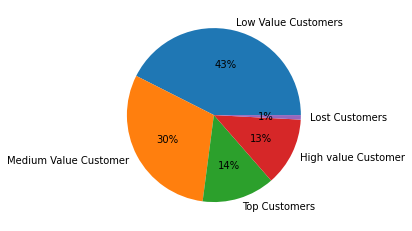

In [107]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [205]:
rfm_df['Customer_segment'].value_counts()

Low Value Customers      119212
Medium Value Customer     85066
Top Customers             37824
High value Customer       35648
Lost Customers             2339
Name: Customer_segment, dtype: int64

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  #plot the acf and pacf 

import statsmodels.api as sm  #LJung Box test
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA

import warnings
warnings.filterwarnings('ignore')

In [109]:
dfv.to_csv('file3S.csv')

In [110]:
df1=pd.read_csv("/Users/maitrinarang/file3S.csv", parse_dates=['reviewTime'])
df1.head(1)

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,Customer_churn
0,0,4,True,2014-03-11,A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,...,"15,675 in Software (",[],Software,NaN,</div>,49,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN,NO


In [111]:
df1['price'].value_counts()

49     354247
0       10465
29       6367
39       6306
34       5028
        ...  
261         1
125         1
405         1
352         1
197         1
Name: price, Length: 232, dtype: int64

In [112]:
df1['year'] = pd.DatetimeIndex(df1['reviewTime']).year
df1['year']

0         2014
1         2014
2         2014
3         2014
4         2015
          ... 
499826    2016
499827    2018
499828    2017
499829    2018
499830    2016
Name: year, Length: 499831, dtype: int64

In [113]:
df1['main_cat'].value_counts()

Software                                                                                                                                                                      468551
Video Games                                                                                                                                                                    12617
Cell Phones & Accessories                                                                                                                                                       4385
All Electronics                                                                                                                                                                 4062
Toys & Games                                                                                                                                                                    2601
Movies & TV                                                                                    

In [114]:
dfA = df1.groupby(
    by=['asin'], as_index=False)['reviewTime'].count()
dfA.columns = ['asin', 'Frequency']
dfA

,asin,Frequency
0,0030672120,1
1,0071480935,5
2,007329506X,1
3,0073513458,1
4,0073525758,1
...,...,...
21633,B01HEFZJC2,4
21634,B01HEFZKEE,3
21635,B01HF3G4BS,2
21636,B01HF41TKI,1


In [115]:
time = dfA.merge(df1, on='asin')
time1 = pd.DataFrame()
time1 = time[['reviewTime','asin','price',  'overall','Frequency','main_cat' ,'year']]
#time1

DF =  time1.loc[(time1['main_cat'] == 'Video Games')]
DF

,reviewTime,asin,price,overall,Frequency,main_cat,year
413,2016-12-27,0545071852,0,5,2,Video Games,2016
414,2016-02-10,0545071852,0,5,2,Video Games,2016
552,2011-10-12,0669524115,49,3,27,Video Games,2011
553,2011-03-14,0669524115,49,5,27,Video Games,2011
554,2010-08-21,0669524115,49,5,27,Video Games,2010
...,...,...,...,...,...,...,...
476138,2016-01-24,B015ONXBXA,49,5,3,Video Games,2016
476139,2015-11-28,B015ONXBXA,49,1,3,Video Games,2015
476140,2015-12-30,B015OOLJ3I,49,5,2,Video Games,2015
476141,2015-12-13,B015OOLJ3I,49,1,2,Video Games,2015


In [116]:
DF['year'].value_counts()

2015    1049
2013    1005
2014     991
2002     872
2003     810
2001     788
2005     757
2007     746
2016     735
2004     667
2006     660
2009     588
2008     561
2012     521
2000     464
2011     438
2010     394
2017     340
2018     149
1999      82
Name: year, dtype: int64

In [117]:
DF['reviewTime'] = pd.to_datetime(DF['reviewTime'])

In [118]:
DF= DF.set_index('reviewTime')
DF.tail()

,asin,price,overall,Frequency,main_cat,year
reviewTime,,,,,,
2016-01-24,B015ONXBXA,49,5,3,Video Games,2016
2015-11-28,B015ONXBXA,49,1,3,Video Games,2015
2015-12-30,B015OOLJ3I,49,5,2,Video Games,2015
2015-12-13,B015OOLJ3I,49,1,2,Video Games,2015
2016-05-21,B01DTJYXEW,49,1,1,Video Games,2016


In [119]:
DF.sort_values(by='reviewTime',inplace=True)
DF

,asin,price,overall,Frequency,main_cat,year
reviewTime,,,,,,
1999-06-18,B00002SV6E,0,5,22,Video Games,1999
1999-06-18,B00002SV6E,0,5,22,Video Games,1999
1999-11-10,B00000K4CS,0,1,132,Video Games,1999
1999-11-10,B00000K4CS,0,1,132,Video Games,1999
1999-11-12,B00000K4CS,0,2,132,Video Games,1999
...,...,...,...,...,...,...
2018-05-30,B009CYIA20,49,1,7,Video Games,2018
2018-06-06,B00LC66DPW,0,5,27,Video Games,2018
2018-06-25,B00UG9IXGI,49,1,27,Video Games,2018


In [120]:
y = DF["Frequency"].resample('M').sum() #M means Month 
y.head()

reviewTime
1999-06-30    44
1999-07-31     0
1999-08-31     0
1999-09-30     0
1999-10-31     0
Freq: M, Name: Frequency, dtype: int64

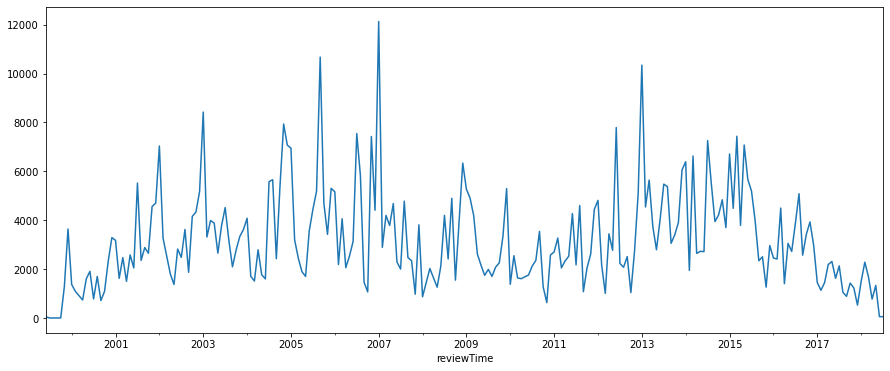

In [121]:
y.plot(figsize=(15,6))
plt.show()

In [122]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if(pvalue>0.05):
        msg = 'p-value= {}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value=  {}. Data is stationary'.format(pvalue)
        
    return(msg)

In [123]:
checkStationarity(y)

'p-value=  9.895687666446715e-09. Data is stationary'

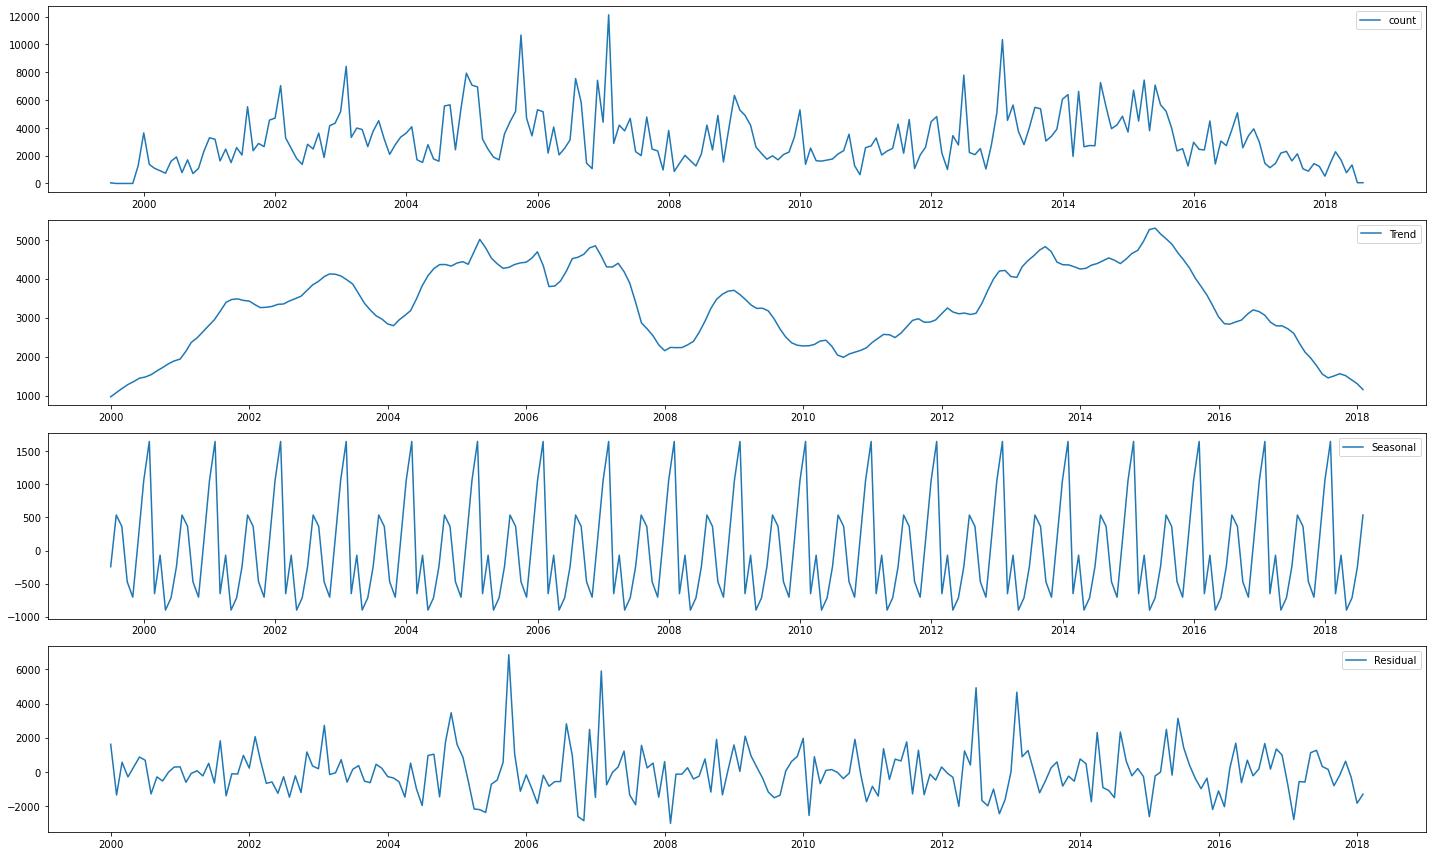

In [125]:
comp=seasonal_decompose(y,period=12)
y_trend=comp.trend
y_seasonal=comp.seasonal
y_residual=comp.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(y,label='count')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(y_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(y_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(y_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [126]:
y

reviewTime
1999-06-30      44
1999-07-31       0
1999-08-31       0
1999-09-30       0
1999-10-31       0
              ... 
2018-03-31    1684
2018-04-30     771
2018-05-31    1332
2018-06-30      54
2018-07-31      54
Freq: M, Name: Frequency, Length: 230, dtype: int64

In [127]:
ratio=0.7
ss1=int(len(y)*ratio)
train=y[:ss1]
test=y[ss1:]

In [128]:
ss1

161

In [129]:
train

reviewTime
1999-06-30      44
1999-07-31       0
1999-08-31       0
1999-09-30       0
1999-10-31       0
              ... 
2012-06-30    7791
2012-07-31    2230
2012-08-31    2075
2012-09-30    2512
2012-10-31    1040
Freq: M, Name: Frequency, Length: 161, dtype: int64

In [130]:
test

reviewTime
2012-11-30     2735
2012-12-31     5097
2013-01-31    10346
2013-02-28     4540
2013-03-31     5642
              ...  
2018-03-31     1684
2018-04-30      771
2018-05-31     1332
2018-06-30       54
2018-07-31       54
Freq: M, Name: Frequency, Length: 69, dtype: int64

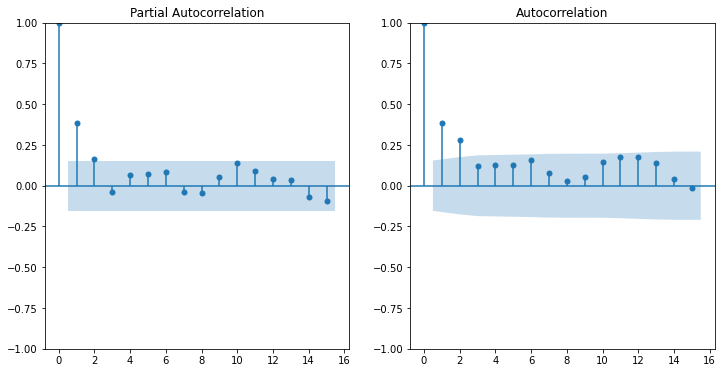

In [131]:
_,ax=plt.subplots(1,2,figsize=(12,6))

plot_pacf(train,lags=15,ax=ax[0]);
plot_acf(train,lags=15,ax=ax[1]);

In [132]:
p=[0,1,2, 3] 
q=[0,1,2, 3]


p1=[]
q1=[]
aic1=[]
rmse1=[]

def modelcheck(p,q):
    p1.append(p)
    q1.append(q)
    model=ARIMA(train,order=(p,0,q)).fit()
    aic=model.aic
    aic1.append(aic)
    fcast=model.forecast(len(test))
    actual = []; pred = []
    for i in range(len(fcast)):
        actual.append(test[i])
        pred.append(fcast[i])
    df= pd.DataFrame({'actual':actual, 'predicted':pred})
    rmse=mean_squared_error(df.actual,df.predicted,squared=False)
    rmse1.append(rmse)
     

In [133]:
for i in p:
    for j in q:
        modelcheck(i,j)
        
df_value=pd.DataFrame({"p": p1,"q": q1,"aic":aic1,"RMSE":rmse1})
df_value.sort_values('RMSE')

,p,q,aic,RMSE
1,0,1,2885.364284,2039.194697
0,0,0,2901.322132,2039.497255
2,0,2,2876.444570,2046.375925
3,0,3,2877.542383,2051.414268
4,1,0,2877.150726,2051.757857
6,1,2,2877.102030,2061.972006
9,2,1,2876.396759,2064.845889
12,3,0,2876.587651,2067.193799
8,2,0,2874.723079,2071.401160
5,1,1,2875.121691,2078.767281


In [134]:
model_arima=ARIMA(train,order=(0,0,1)).fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                  161
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1439.682
Date:                Wed, 07 Dec 2022   AIC                           2885.364
Time:                        15:37:32   BIC                           2894.608
Sample:                    06-30-1999   HQIC                          2889.118
                         - 10-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3081.0373    242.619     12.699      0.000    2605.513    3556.562
ma.L1          0.2781      0.074      3.753      0.000       0.133       0.423
sigma2      3.399e+06   2.88e+05     11.821      0.000    2.84e+06    3.96e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):               164.32
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.54
Prob(H) (two-sided):                  0.57   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
fcast1=model_arima.fittedvalues

In [136]:
df_f = pd.DataFrame({'actual':y, 'forecast':fcast1})
len(df_f)

230

In [139]:
A= df_f.iloc[0:150]

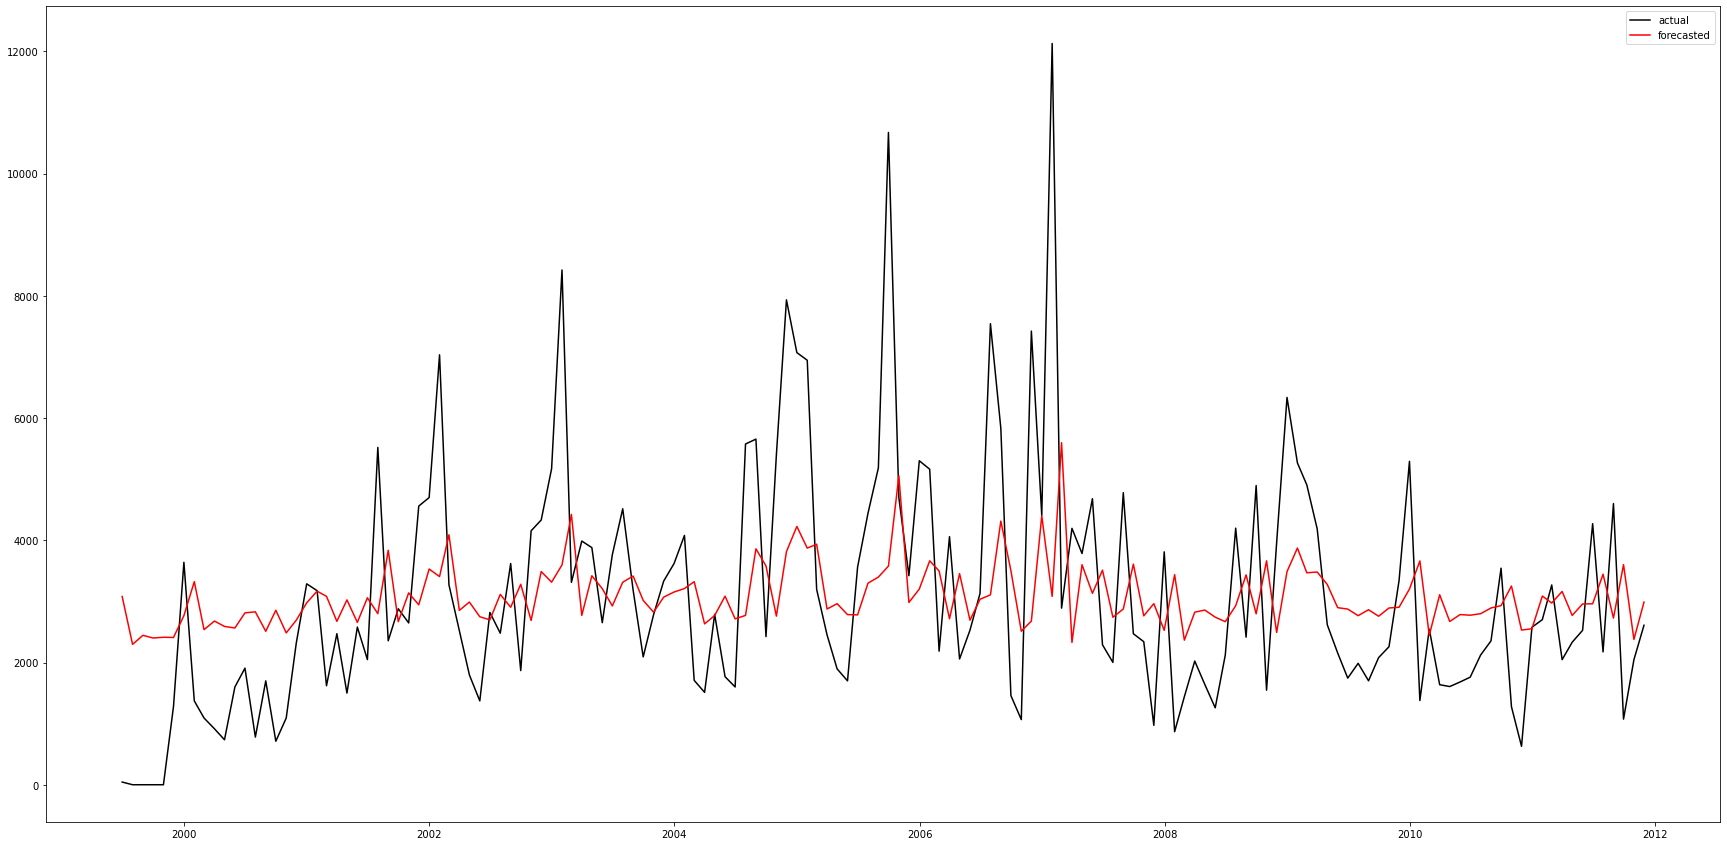

In [140]:
plt.figure(figsize=(30, 15))
plt.plot(A['actual'], c='black', label='actual')
plt.plot(A['forecast'], c='red', label='forecasted')
plt.legend()
plt.show()

In [141]:
mse1= mean_squared_error(A.actual , A.forecast)
mse1

3397936.040663676

In [142]:
aic1=model_arima.aic
aic1

2885.36428425151

In [143]:
bic1=model_arima.bic
bic1

2894.6084973464635

In [144]:
rmse1=mean_squared_error( A.actual , A.forecast, squared=False)
rmse1

1843.3491369416906

# SARIMA¶

In [145]:
sales_comp=seasonal_decompose(y,period=12)
sales_seasonal=sales_comp.seasonal

In [146]:
checkStationarity(sales_seasonal)

'p-value=  0.0. Data is stationary'

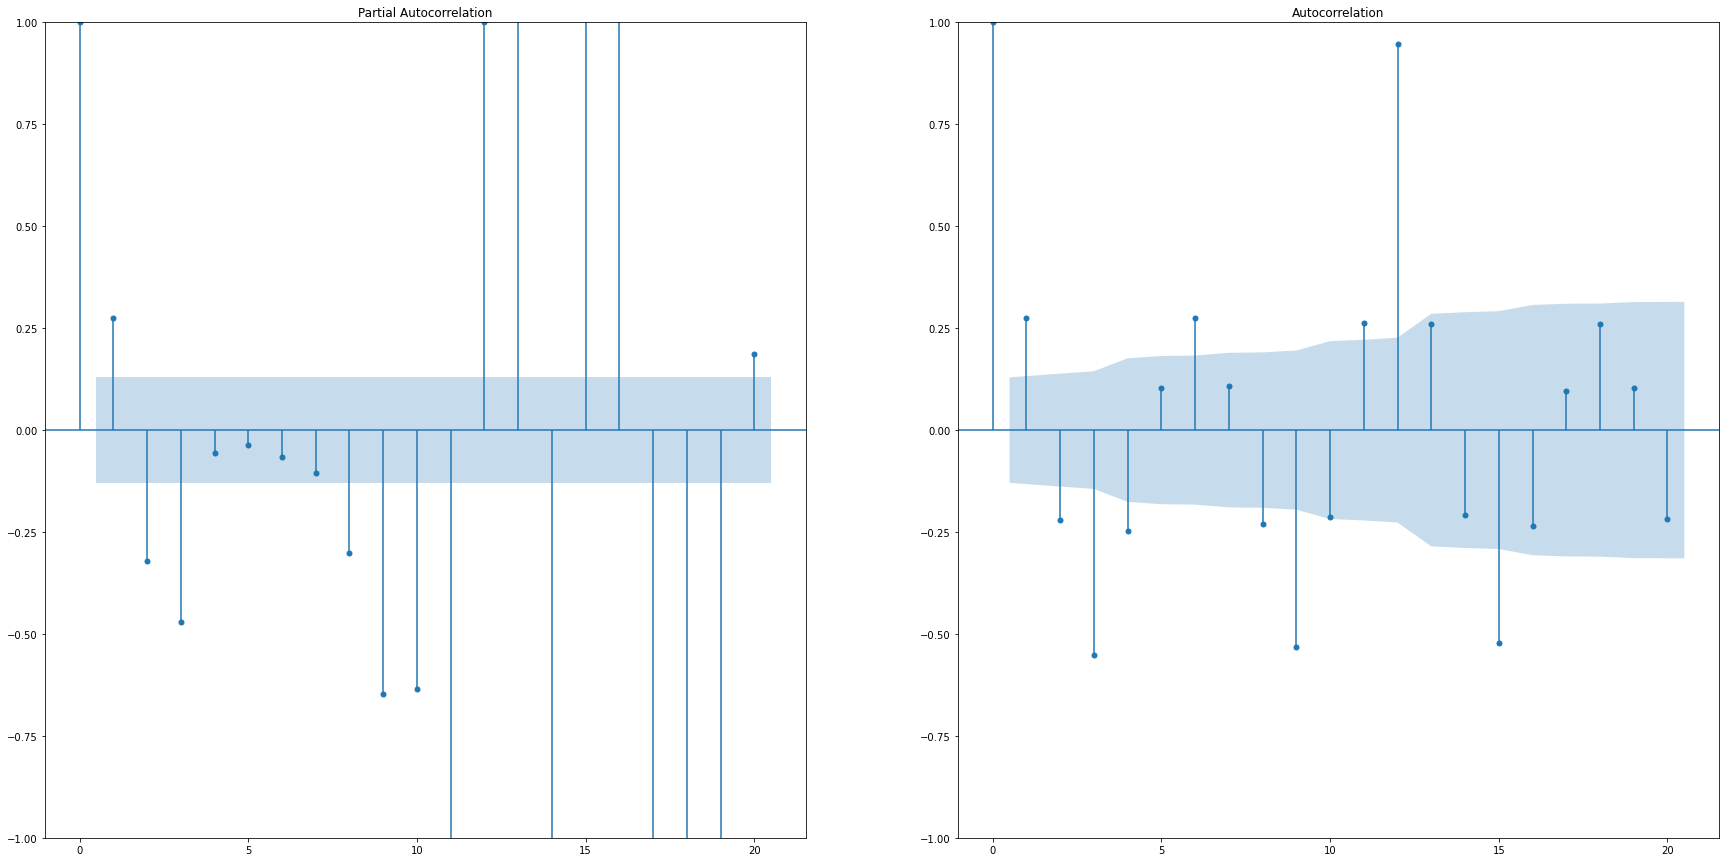

In [147]:
_,ax=plt.subplots(1,2,figsize=(30,15))

plot_pacf(sales_seasonal,lags=20,ax=ax[0]);
plot_acf(sales_seasonal,lags=20,ax=ax[1]);

In [148]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
m_seasonal= auto_arima(y,start_p=0, max_p=10, start_q=0, max_q=10, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4148.343, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4103.644, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4120.859, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4439.848, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4095.633, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4097.607, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4097.391, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4100.743, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4099.385, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4123.299, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.364 seconds


In [149]:
p=2;q=0;d=0
P=0;Q=0;D=0
model_sari=sm.tsa.statespace.SARIMAX(y,order=(p,d,q), seasonal_order=(P,D,Q,12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.95071D+00    |proj g|=  3.10528D-03

At iterate    5    f=  8.95065D+00    |proj g|=  8.85231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   4.597D-06   8.951D+00
  F =   8.9506506469120541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [150]:
model_sari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                  230
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2058.650
Date:                Wed, 07 Dec 2022   AIC                           4123.299
Time:                        15:40:41   BIC                           4133.614
Sample:                    06-30-1999   HQIC                          4127.460
                         - 07-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5135      0.048     10.691      0.000       0.419       0.608
ar.L2          0.3848      0.054      7.134      0.000       0.279       0.490
sigma2       3.49e+06   2.49e+05     14.044      0.000       3e+06    3.98e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                43.50
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.65
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
fcast_sari=model_sari.fittedvalues

In [152]:
df_sari = pd.DataFrame({'actual':y, 'forecast':fcast_sari})
df_sari.head()

,actual,forecast
reviewTime,,
1999-06-30,44,0.000000
1999-07-31,0,36.724429
1999-08-31,0,16.929864
1999-09-30,0,0.000000
1999-10-31,0,0.000000


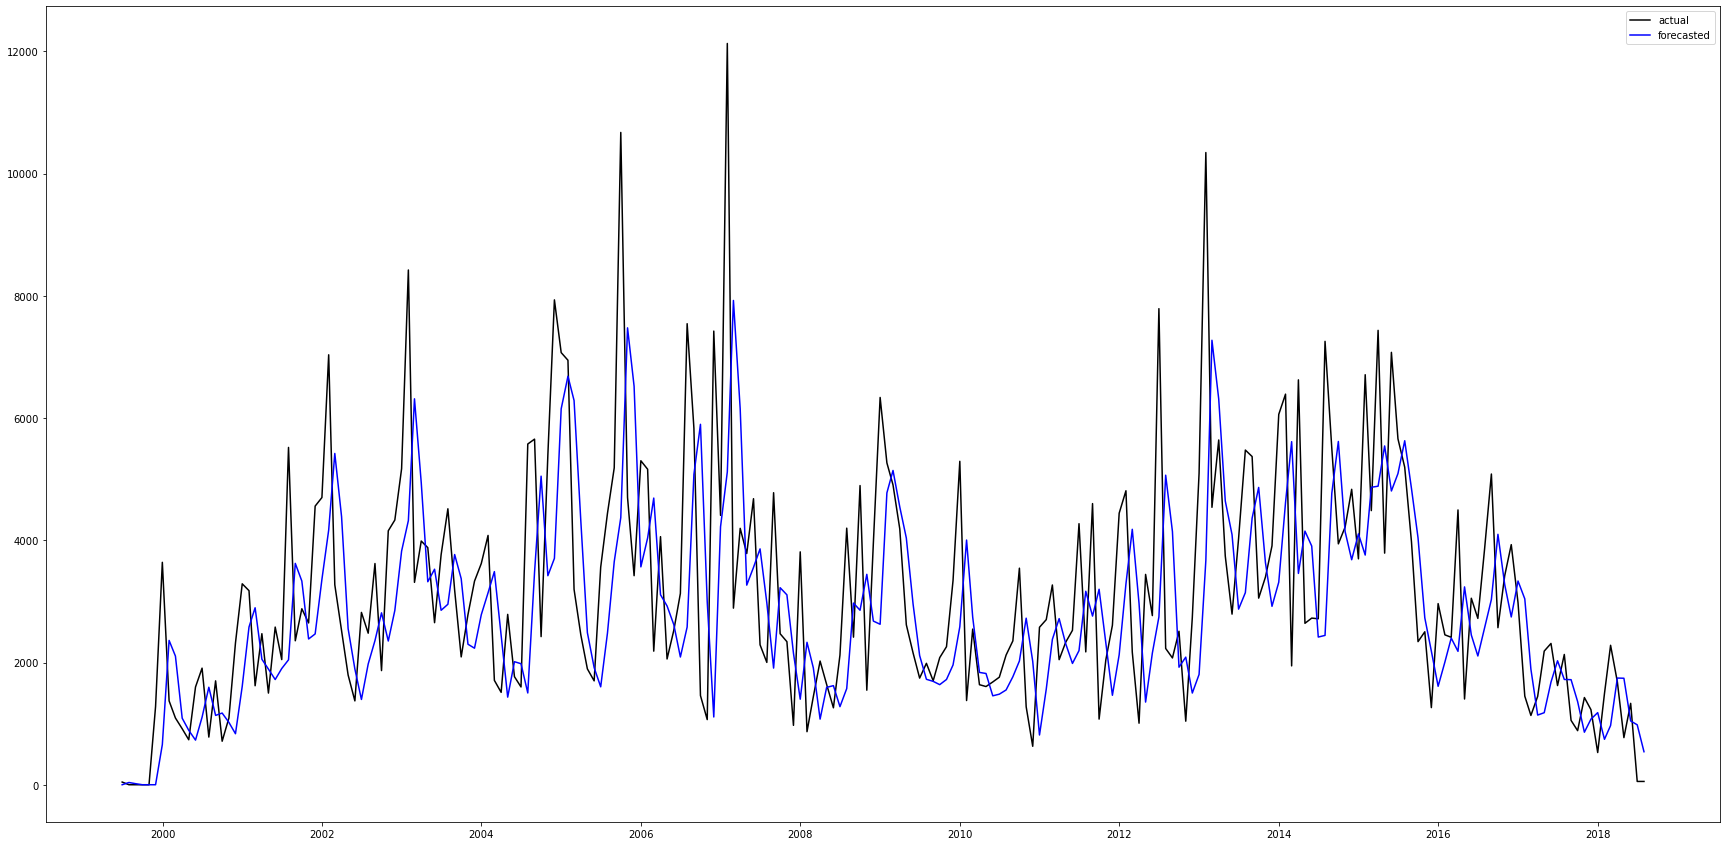

In [153]:
plt.figure(figsize=(30, 15))
plt.plot(df_sari['actual'], c='black', label='actual')
plt.plot(df_sari['forecast'], c='blue', label='forecasted')
plt.legend()
plt.show()

In [154]:
mse2= mean_squared_error(y , fcast_sari)
mse2

3460106.0168406237

In [155]:
aic2=model_sari.aic
aic2

4123.299297579545

In [156]:
bic2=model_sari.bic
bic2

4133.613535506314

In [157]:
rmse2=mean_squared_error(y, fcast_sari, squared=False)
rmse2
     

1860.1360210588427

# SARIMAX with exogenous variables :

In [158]:
dfs= DF[['overall', 'price','Frequency']].resample('M').sum()
dfs

,overall,price,Frequency
reviewTime,,,
1999-06-30,10,0,44
1999-07-31,0,0,0
1999-08-31,0,0,0
1999-09-30,0,0,0
1999-10-31,0,0,0
...,...,...,...
2018-03-31,153,1396,1684
2018-04-30,81,891,771
2018-05-31,74,1088,1332


In [159]:
rows=int(0.7*len(dfs))
rows

161

In [160]:
train=dfs.iloc[:rows]
test=dfs.iloc[rows:]
test.head()

,overall,price,Frequency
reviewTime,,,
2012-11-30,263,2349,2735
2012-12-31,343,2729,5097
2013-01-31,577,5583,10346
2013-02-28,415,3291,4540
2013-03-31,319,3833,5642


In [161]:
exog_train= train[['overall','price']]
exog_test= test[['overall', 'price']]

exog_train




,overall,price
reviewTime,,
1999-06-30,10,0
1999-07-31,0,0
1999-08-31,0,0
1999-09-30,0,0
1999-10-31,0,0
...,...,...
2012-06-30,215,4567
2012-07-31,107,1421
2012-08-31,125,1676


In [162]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sari2= SARIMAX(train.Frequency, order=(2,0,0), seasonal_order=(0,0,0,12), exog=exog_train).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26566D+00    |proj g|=  4.56158D-02

At iterate    5    f=  8.26497D+00    |proj g|=  8.89354D-03

At iterate   10    f=  8.26331D+00    |proj g|=  1.08778D-02

At iterate   15    f=  8.26319D+00    |proj g|=  1.83789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   1.838D-05   8.263D+00
  F =   8.2631913585941259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [163]:
model_sari2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Frequency   No. Observations:                  161
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1330.374
Date:                Wed, 07 Dec 2022   AIC                           2670.748
Time:                        15:43:09   BIC                           2686.155
Sample:                    06-30-1999   HQIC                          2677.003
                         - 10-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
overall        6.9446      1.335      5.200      0.000       4.327       9.562
price          0.9453      0.147      6.448      0.000       0.658       1.233
ar.L1          0.3679      0.074      4.992      0.000       0.223       0.512
ar.L2          0.1256      0.085      1.480      0.139      -0.041       0.292
sigma2      8.949e+05   9.53e+04      9.389      0.000    7.08e+05    1.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.77
Prob(Q):                              0.92   Prob(JB):                         0.03
Heteroskedasticity (H):               1.14   Skew:                             0.45
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
fv= model_sari2.fittedvalues
fv

reviewTime
1999-06-30      69.445625
1999-07-31     -10.706421
1999-08-31      -3.196218
1999-09-30       0.000000
1999-10-31       0.000000
                 ...     
2012-06-30    6062.145950
2012-07-31    2850.539053
2012-08-31    2754.042551
2012-09-30    2679.232718
2012-10-31    1131.135737
Freq: M, Length: 161, dtype: float64

In [165]:
fv_test2= model_sari2.forecast(len(test.Frequency), exog=exog_test)
fv_test2

2012-11-30    3920.781273
2012-12-31    4884.574361
2013-01-31    9240.372959
2013-02-28    5967.001873
2013-03-31    5823.524620
                 ...     
2018-03-31    2382.148421
2018-04-30    1404.766475
2018-05-31    1542.377445
2018-06-30      87.986779
2018-07-31      34.722813
Freq: M, Name: predicted_mean, Length: 69, dtype: float64

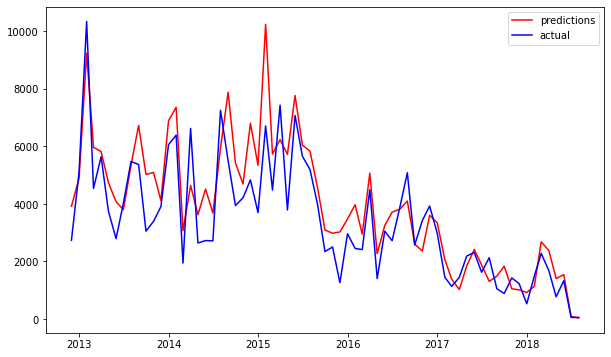

In [166]:
plt.figure(figsize=(10,6))
plt.plot(fv_test2 , 'r',label='predictions')
plt.plot(test.Frequency , 'b',label='actual')
plt.legend()

In [167]:
mse3= mean_squared_error(test.Frequency , fv_test2)
mse3

1166123.5971252802

In [168]:
aic3=model_sari2.aic
aic3

2670.7476174673084

In [169]:
bic3=model_sari2.bic
bic3

2686.1546392922305

In [170]:
rmse3=mean_squared_error(test.Frequency, fv_test2, squared=False)
rmse3
     

1079.8720281242959

In [171]:
results=list()
names=list()
results.append(rmse1)
names.append('Arima_rmse')
results.append(rmse2)
names.append('Sarima_rmse')
results.append(rmse3)
names.append('Sarimax_rmse')
results.append(aic1)
names.append('Arima_Aic')
results.append(aic2)
names.append('Sarima_Aic')
results.append(aic3)
names.append('Sarimax_Aic')
results.append(bic1)
names.append('Arima_Bic')
results.append(bic2)
names.append('Sarima_Bic')
results.append(bic3)
names.append('Sarimax_Bic')

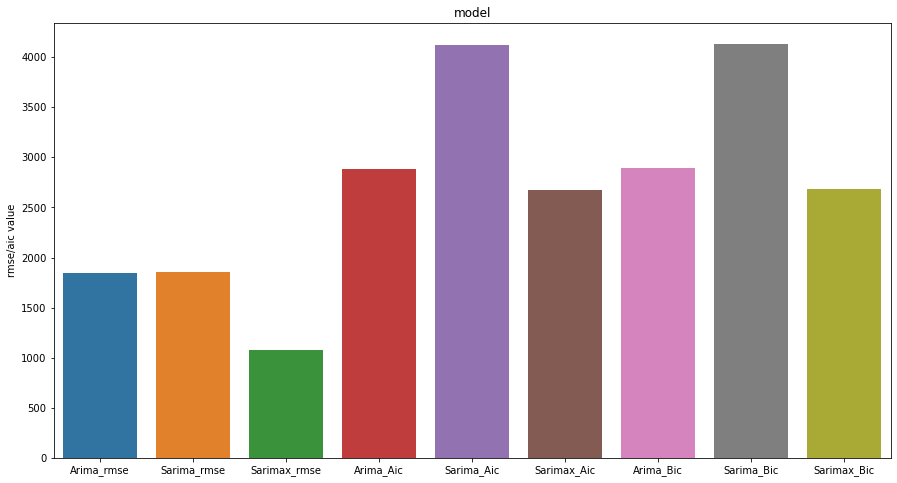

In [172]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(names,results);
plt.ylabel('rmse/aic value')
plt.title('model');

In [173]:
from tabulate import tabulate

data=[["ARIMA",mse1,rmse1, aic1, bic1],
      ["SARIMA",mse2,rmse2,aic2, bic2],
       ["SARIMAX",mse3,rmse3,aic3, bic3]]
head=["MODEL","MSE","RMSE","AIC","BIC"]
print(tabulate(data, headers=head, tablefmt="grid"))




+---------+-------------+---------+---------+---------+
| MODEL   |         MSE |    RMSE |     AIC |     BIC |
+=========+=============+=========+=========+=========+
| ARIMA   | 3.39794e+06 | 1843.35 | 2885.36 | 2894.61 |
+---------+-------------+---------+---------+---------+
| SARIMA  | 3.46011e+06 | 1860.14 | 4123.3  | 4133.61 |
+---------+-------------+---------+---------+---------+
| SARIMAX | 1.16612e+06 | 1079.87 | 2670.75 | 2686.15 |
+---------+-------------+---------+---------+---------+


In [175]:
fcast3 = model_sari2.predict(start=len(y), end=len(y)+12,exog=exog_train[:82])
print(fcast3)



2018-08-31    1843.293648
2018-09-30    1819.877142
2018-10-31    1898.693785
2018-11-30    2042.237064
2018-12-31    2954.535130
2019-01-31    3197.460897
2019-02-28    7210.196866
2019-03-31    4429.543641
2019-04-30    3931.626792
2019-05-31    4902.458642
2019-06-30    4971.420399
2019-07-31    2178.835780
2019-08-31    4281.028309
Freq: M, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Actual  / Predicted / Future')

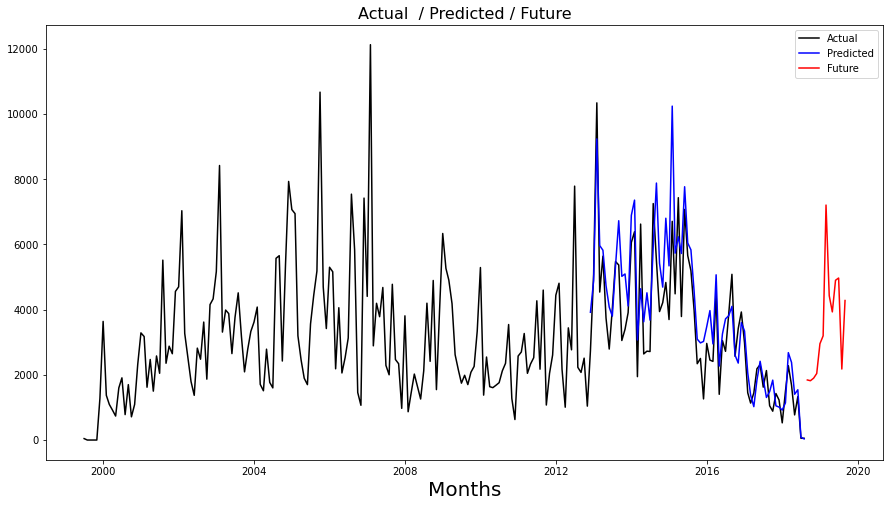

In [189]:

    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(y, color = 'black',label='Actual')  #plot actual data
    ax.plot(fv_test2, color='blue', label='Predicted')          #plot predicted forecast data
    ax.plot(fcast3,color='red', label='Future')            #plot future forecast data
    plt.xlabel('Months',fontsize=20)
    leg = ax.legend(fontsize=10)
    plt.title('Actual  / Predicted / Future',fontsize=16)
    